<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor
import random
from random import randrange

In [2]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()

# Step 1. Load Cifar10 (Links to an external site.) image data. Perform normalizations (each image pixel value from [0, 255] to the range [0, 1]) and display some of the sample images (suggesting 16 images).

In [3]:

(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#Samples Before Normalization 

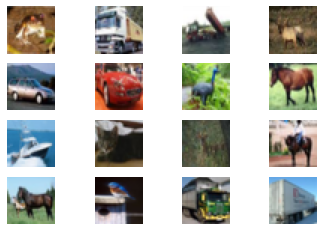

In [4]:
show_imgs(x_train)

# Normalization


In [5]:
batch_size=128
print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255
print(x_train.min() , x_train.max())



0 255
0.0 1.0


#Sample after normalization

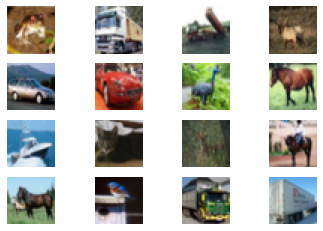

In [6]:
show_imgs(x_train)

# Step 2. Regardless of the 10,000 built-in testing image, write functions to divide the built-in 50,000 training images to your own training and validation sets implementing three major methods {a. hold-out; b. K-fold; c. bootstrap} discussed in lecture 3. Print the sizes of your implemented datasets.

# 1.Hold-out defination
Below function split ds into two parts  as train dataset and validation dataset

In [28]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  # print(len(ds))
 
  if isinstance(train_ds_size, float) and isinstance(vald_ds_size, float) and (train_ds_size+vald_ds_size>1.0) :
    raise ValueError("Split size is greater the dataset size")
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

#Hold-out outputs
70% for training dataset and 30% for validation dataset

In [29]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)
x_train_split
print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


# 2. K-fold defination 
Below function splits dataset and label dataset into given("no_of_folds") number of groups and Each group contains 500 images  as we divided 
50000/100 = 500 "Groups"


In [8]:
def k_fold_split(no_of_folds):
    folds_ds_list,folds_label_list= list(), list();
    fold_counts= int(len(x_train)  // no_of_folds)
    fold_sizes = np.full(no_of_folds, fold_counts , dtype=np.int)
    fold_sizes[:fold_counts%no_of_folds]  +=1
    start_index,stop_index,fold_end_index= 0,0,0
    
    for fold_index in fold_sizes:
      start_index,stop_index =fold_end_index,fold_end_index+fold_index
      folds_ds_list.append(x_train[start_index:stop_index])
      folds_label_list.append(y_train[start_index:stop_index]) 
      fold_end_index=stop_index
    return folds_ds_list,folds_label_list;



Invoke the above function which creates 100 groups of dataset and label

In [9]:
folds_ds_list,folds_label_list = k_fold_split(100)

##Below method apply k-fold logic to get "99" groups for training set and "1" group for validation set .
* Yield statement is used to control the flow of the generator function 
* next funtion is used to verify the output the function. 


In [ ]:

def apply_data_validation_set_from_folds():
    start_index,stop_index,fold_end_index= -1,0,0
    for i in range(len(folds_ds_list)):
      print( " Training data -> fold [0:"+str(start_index+1)+ "] and [" + str(start_index+2)+ ":" + str(len(folds_ds_list)) + 
            "] Validation dataset fold ->" +str(start_index+1))
      train,valid= folds_ds_list[0:start_index+1] +folds_ds_list[start_index+2: len(folds_ds_list)] ,[folds_ds_list[start_index+1]]
      yield train,valid 
      start_index +=1
      
apply_fold=apply_data_validation_set_from_folds()  
count=0
while True:
  try:
      train_fold,validation_fold,=next(apply_fold)
      # print( str(count)+ " train dataset"+ str(len(train_fold)) +" validation_fold :"+ str(len(validation_fold)) )
      count+=1;
  except StopIteration:
     break



# 3. Bootstrap resampling

sample1 shape(1000, 32, 32, 3)


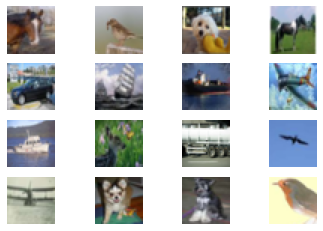

sample2 shape(1000, 32, 32, 3)


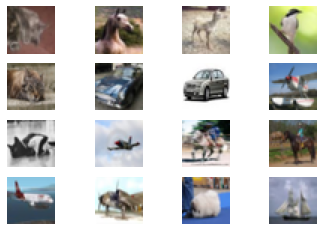

sample3 shape(1000, 32, 32, 3)


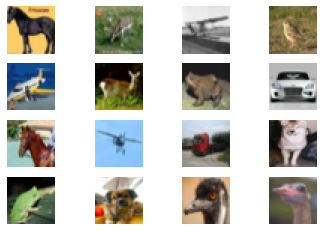

sample4 shape(1000, 32, 32, 3)


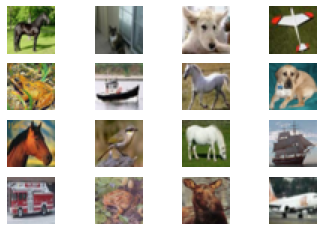

sample5 shape(1000, 32, 32, 3)


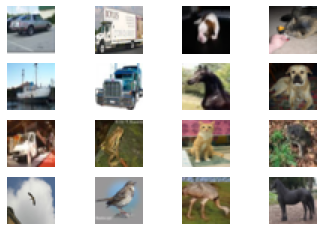

In [34]:
for i in range(5):
  sample_indices= (np.random.rand(1000 )*len(x_train)).astype(int);
  bootstrap_samples=x_train[sample_indices]
  print("sample :"+str(i+1)+ " shape" + str(bootstrap_samples.shape))
  show_imgs(bootstrap_samples)

#Bonus
K-fold cross validations

In [11]:
def k_fold_cross_validation(ds,labels_train,fold_count):
    ds_fold=ceil(len(ds)/fold_count)
    fold_list=list();
    label_fold_list=list()
    for i in range(fold_count):
      
      fold_entires=list();
      fold_list.append(fold_entires)
      label_fold=list();
      label_fold_list.append(label_fold)
      #rand_indices=random.sample(range(0, len(ds)), ds_fold)
      #  print(rand_indices)
      # print(len(fold_list))
      while len(fold_entires) < ds_fold:     
        index = randrange(len(ds))
        label_fold.append(labels_train.pop(index))
        fold_entires.append(ds.pop(index))
      
      # for k in range(len(rand_indices)): 
      #   ds.pop(k-1)
    return fold_list,label_fold_list;
    
image_list,label_list=k_fold_cross_validation(list(x_train),list(y_train),50)
# print(image_list)
# print(label_list)
validation_ds_fold_list=list()
validation_label_fold_list=list()

def create_validation_from_k_fold(validation_count_from_each_fold=3):
   for i in image_list:
   
     validation_count_from_each_fold_index=0    
    #  print(i)
     while validation_count_from_each_fold_index < validation_count_from_each_fold:
       index = randrange(len(i))
       validation_ds_fold_list.append(i.pop(index))
      #  validation_label_fold_list.append(label_list[i].pop(index))
       validation_count_from_each_fold_index+=1
create_validation_from_k_fold(30);



In [35]:
print(len(validation_ds_fold_list))
print(len(image_list[0]))


1500
970


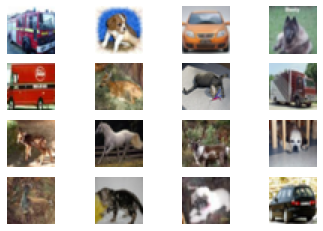

In [14]:
show_imgs(image_list[0])

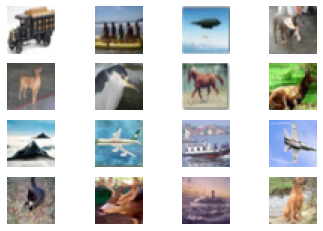

In [15]:
show_imgs(validation_ds_fold_list)

In [17]:
batch_size=128
print(len(x_train))
print(len(x_train)/batch_size)
print(len(x_train)%batch_size)
def get_batch_data(batch_size=64):
   if len(x_train)<batch_size:
     raise ValueError("Batch size should be smaller than x_train size")
   batch_count=int(len(x_train)/batch_size)
   batch_rest=int(len(x_train)%batch_size)
   startindex=0;
   cur_batch_index=0;
   for i in range(batch_count):
      cur_batch_index=i
      batch_end=startindex+batch_size
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch
      startindex=batch_end
      #print(cur_batch_index,batch_count-1)
   if batch_rest>0 and cur_batch_index== batch_count-1:
     
      batch_end=batch_end+batch_rest
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch;
  
   
gen=get_batch_data(128)   ;





50000
390.625
80


In [19]:
count=1
while True:
  try:
        x_batch_2,y_batch_2=next(gen)
        print( str(count)+ " Validation dataset"+ str(x_batch_2.shape) +" Label :"+ str(y_batch_2.shape) )
        count+=1
  except StopIteration:
     break
  

1 Validation dataset(128, 32, 32, 3) Label :(128, 1)
2 Validation dataset(128, 32, 32, 3) Label :(128, 1)
3 Validation dataset(128, 32, 32, 3) Label :(128, 1)
4 Validation dataset(128, 32, 32, 3) Label :(128, 1)
5 Validation dataset(128, 32, 32, 3) Label :(128, 1)
6 Validation dataset(128, 32, 32, 3) Label :(128, 1)
7 Validation dataset(128, 32, 32, 3) Label :(128, 1)
8 Validation dataset(128, 32, 32, 3) Label :(128, 1)
9 Validation dataset(128, 32, 32, 3) Label :(128, 1)
10 Validation dataset(128, 32, 32, 3) Label :(128, 1)
11 Validation dataset(128, 32, 32, 3) Label :(128, 1)
12 Validation dataset(128, 32, 32, 3) Label :(128, 1)
13 Validation dataset(128, 32, 32, 3) Label :(128, 1)
14 Validation dataset(128, 32, 32, 3) Label :(128, 1)
15 Validation dataset(128, 32, 32, 3) Label :(128, 1)
16 Validation dataset(128, 32, 32, 3) Label :(128, 1)
17 Validation dataset(128, 32, 32, 3) Label :(128, 1)
18 Validation dataset(128, 32, 32, 3) Label :(128, 1)
19 Validation dataset(128, 32, 32, 3)